### Lineare Regression mit Keras nachbauen

#### 1) Daten laden

In [1]:
import pandas as pd
from math import ceil

pd.set_option('display.max_columns', 6)

data_url=r'https://github.com/tplusone/hanser_ml_zeitreihen/blob/master/Daten/insurance.csv?raw=true'
df = pd.read_csv(data_url)
df.head()

,age,sex,bmi,...,smoker,region,charges
0,19,female,27.900,...,yes,southwest,16884.92400
1,18,male,33.770,...,no,southeast,1725.55230
2,28,male,33.000,...,no,southeast,4449.46200
3,33,male,22.705,...,no,northwest,21984.47061
4,32,male,28.880,...,no,northwest,3866.85520


#### 2) x-/y-Daten selektieren und standardisieren

In [2]:
from sklearn.preprocessing import StandardScaler

X = df[['age', 'bmi', 'children']].values
y = df[['charges']].values

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

X.shape, y.shape

((1338, 3), (1338, 1))

#### 3) Keras-Modell aufbauen

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(units=1, input_shape=(3,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


#### 4) Modell kompilieren
##### Variante 1:

In [4]:
model.compile(loss='mse', optimizer='sgd')

##### Variante 2:

In [5]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import SGD

mse = MeanSquaredError()
sgd = SGD(learning_rate=0.005)
model.compile(loss=mse, optimizer=sgd)

#### 5) Modell anlernen

In [6]:
history = model.fit(X, y, epochs=5, batch_size=16)

Train on 1338 samples
Epoch 1/5
1338/1338 [==============================] - 0s 255us/sample - loss: 1.1508
Epoch 2/5
1338/1338 [==============================] - 0s 76us/sample - loss: 0.9301
Epoch 3/5
1338/1338 [==============================] - 0s 75us/sample - loss: 0.8907
Epoch 4/5
1338/1338 [==============================] - 0s 75us/sample - loss: 0.8830
Epoch 5/5
1338/1338 [==============================] - 0s 62us/sample - loss: 0.8817


#### 6) Nach dem Anlernen

##### Gewichte abfragen:

In [7]:
weights = model.get_layer(index=0).get_weights()
weights

[array([[0.28276473],
        [0.16582102],
        [0.04547752]], dtype=float32),
 array([-0.0075039], dtype=float32)]

##### Schätzungen für einen Beispieldatensatz erzeugen:

In [8]:
X_pred = [[40., 20.1, 1.]]
X_pred = scaler_X.transform(X_pred)
y_pred = model.predict(X_pred)
y_pred = scaler_y.inverse_transform(y_pred)
y_pred

array([[9851.025]], dtype=float32)

#### 7) Evaluation

##### R-Quadrat:

In [9]:
from sklearn.metrics import r2_score
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print('r2 = {:.3f}'.format(r2))

r2 = 0.120


#### 8) Anlernprozess graphisch darstellen

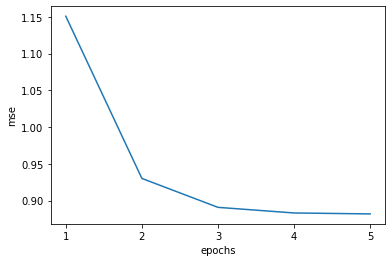

In [10]:
import matplotlib.pyplot as plt

loss_mse = history.history['loss']
plt.xticks(range(1, len(loss_mse)+1))
plt.ylabel('mse')
plt.xlabel('epochs')
plt.plot(range(1, len(loss_mse)+1), loss_mse)